In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 0 = Not Survived , 1 = Survived

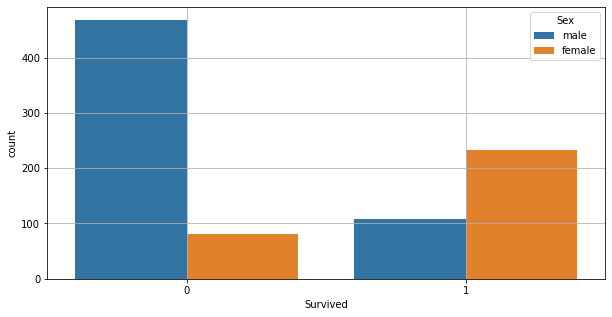

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.grid()

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

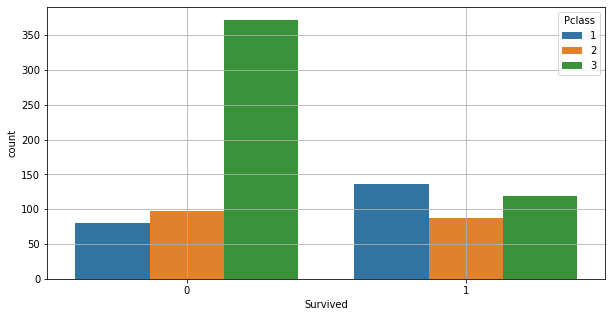

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.grid()

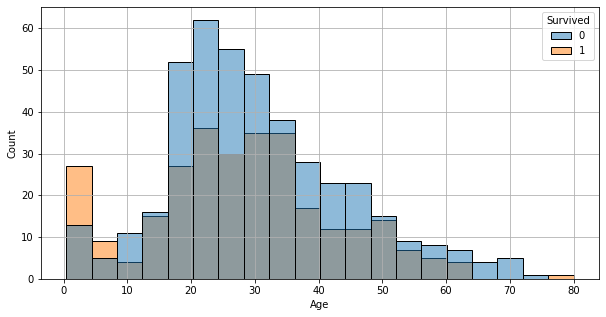

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(x ='Age',hue ='Survived', data=df)
plt.grid()

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [11]:
df['Age'].fillna((df['Age'].mean()),inplace=True)

In [12]:
dummy = pd.get_dummies(df['Sex'])
merged = pd.concat([df,dummy],axis='columns')
merged.sample(2)

,Survived,Pclass,Sex,Age,Fare,female,male
321,0,3,male,27.0,7.8958,0,1
273,0,1,male,37.0,29.7000,0,1


In [13]:
df_final = merged.drop(columns=['Sex','female'])
df_final.sample(2)

,Survived,Pclass,Age,Fare,male
294,0,3,24.0,7.8958,1
508,0,3,28.0,22.5250,1


In [14]:
X = df_final.drop('Survived',axis='columns')
y = df_final.Survived

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
model.score(X_test,y_test)

0.7988826815642458